## <font color = '#0f0264'> <center> Referat laborator 08 </center></font>

Modificati titlul fisierului păstrând formatul acestuia, cu datele dvs:
- numar grupa
- nume
- prenume

Rulati codurile indicate in celulele de mai jos, care furnizeaza:
- functia utilizata la afisarea formelor de unda ale marimilor electrice ale circuitelor analizate, in cadrul analizei in regim tranzitoriu;

In [2]:
# import librarie utilizata la afisare grafice
import matplotlib.pyplot as plt

# implementare functie afisare grafice
def draw_waveforms(wfi, wfo):
    '''
    functia afiseaza graficele variatiilor in TIMP ale marimilor wfi, wfo
    
    wfi: primeste obiectul Waveform utilizat pentru reprezentarea marimii electrice de intrare
    wfo: primeste obiectul Waveform utilizat pentru reprezentarea marimii electrice de iesire
    '''
    fig = plt.figure(figsize=(12,6))
    plt.title('Input voltage vs. output voltage')
    plt.xlabel('Time [sec]')
    plt.ylabel('Voltage[Volts]')
    plt.grid('on', linewidth = 0.25, linestyle = '--', color = 'green')
    plt.plot(wfi, color = 'red',  label = 'input voltage')
    plt.plot(wfo, color = 'blue', label = 'output voltage')
    plt.legend()

- functia utilizata pentru afisarea graficului caracteristicii de frecventa a amplificatorului;

In [3]:
def draw_freq_characteristics(analysis, wf):
    '''
    functia afiseaza variatia in FRECVENTA a marimii wf;
    functia afiseaza punctat nivelul care corespunde frecventelor
    care definesc banda de frecventa;
    
    analysis: primeste valorile generate de catre analiza AC
    wf: primeste obiectul WaveForm pentru care se afiseaza variatia in frecventa, pe intreg domeniul de analiza
    '''
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,5))

    ax.set_title('Caracteristica de frecventa a amplificatorului')
    ax.set_xlabel(f'Frequency[{analysis.frequency.unit}]')
    ax.set_ylabel(f'AV[{wf.unit}]')
    ax.set_xscale('log')
    ax.grid('on', linewidth = 0.5, linestyle = '--', color = 'green')
    ax.plot( np.array(analysis.frequency),  np.array(wf), color = 'blue')
    ax.axhline(y=0.707*wf.max().item(), linestyle = '--')

- functia utilizata pentru returnarea frecventelor care definesc banda de frecventa a amplificatorului;

In [4]:
def get_frequencies(analysis, av):
    '''
    functia returneaza sub forma de obiect "tuple" (fj, fs)
    frecventele care corespund benzii de frecventa; 
    fj,fs sunt obiecte FrequencyValue
    
    analysis: primeste rezultatele generate de catre analiza AC
    av: primeste valorile amplificarii, valabile pe intreg domeniul de analiza
    '''
    diff = np.absolute(np.array(av) -  np.array(av).max()*0.707)
    diff_j = diff[:int(len(diff)/2)]
    diff_s = diff[int(len(diff)/2):]
    idxj = diff_j.argmin()
    idxs = int(len(diff)/2) + diff_s.argmin()
    
    fj = analysis.frequency[idxj] 
    fs = analysis.frequency[idxs] 
      
    return fj,fs

## 1. Functia de amplificare a tranzistorului bipolar cu jonctiuni

#### 1.1. Determinarea Punctului Static de Functionare al tranzistorului

1. să se editeze circuitul de amplificare cu tranzistor bipolar, indicat in Figura 1

<img src = '803.png' width = 600 height = 500>
<p style="text-align: center;">Figura 1. Amplificator cu tranzistor bipolar </p>

Elementele circuitului sunt:
- sursa $V_{CC}$ reprezinta o **sursa de tensiune continua** - sursa de polarizare a tranzistorului; valoarea tensiunii electrice generata de sursa $V_{CC}$ este este indicata in Tabelul 1; 
- sursa $v_G$ reprezinta o **sursa de tensiune sinusoidala**; tensiunea electrica, generata de sursa $v_G$ reprezinta informatia aplicata la intrarea circuitului, pe care acesta o amplifica; parametrii tensiunii sinusoidale sunt:
  - valoare medie = $0[V]$;
  - amplitudine = $100[mV]$ 
  - frecventa = $1[kHz]$;
- rezistenta $R_g$ reprezinta rezistenta sursei de tensiune $v_G$; $R_g = 600[\Omega]$
- rezistoarele $R_{B1}, R_{B2}, R_C$ si $R_E$ sunt rezistoarele de polarizare ale tranzistorului; rolul acestora este de a controla regiunea de functionare a tranzistorului; pentru a amplifica semnalele, tranzistorul bipolar trebuie sa functioneze in Regiunea Activa Normala (RAN);

- rezistenta $R_L$ reprezinta sarcina amplificatorului; $R_L = 22[k \Omega]$

- condensatoarele $C_B$ si $C_L$ decupleaza in regim de curent continuu, circuitul de polarizare al tranzistorului, compus din cele 4 rezistoare de polarizare si sursa de alimentare $V_{CC}$, de sursa de tensiune $v_G$, conectata la bornele de intrare ale amplificatorului, respectiv de sarcina amplificatorului $R_L$, in scopul mentinerii valorii PSF-ului tranzistorului in RAN; $C_B = C_L = 100\mu F$ 

- pentru tranzistorul bipolar $Q$ se alege modelul indicat in Tabelul 2.


<p style="text-align: center;">Tabelul 1. Valorile componentelor amplificatorului </p>

|Numar   |VCC [V]      |RB1 [kOhm]   | RB2 [kOhm]  |RC [kOhm]    |RE [Ohm]     |  
|:------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|
|1       |10           |47           |10           |1.2          |470          |
|2       |10           |51           |12           |1.4          |510          |
|3       |10           |56           |15           |1.8          |510          |
|4       |10           |62           |18           |2.2          |560          |
|5       |10           |69           |22           |2.7          |560          |
|6       |12           |47           |12           |1.2          |510          |
|7       |12           |56           |12           |1.2          |560          |
|8       |12           |62           |15           |1.5          |560          |
|9       |12           |69           |22           |1.5          |620          |
|10      |12           |71           |27           |2.2          |620          |
|11      |15           |47           |10           |1.5          |620          |
|12      |15           |62           |18           |1.8          |620          |
|13      |15           |69           |22           |1.8          |690          |
|14      |15           |71           |27           |2.2          |690          |
|15      |15           |82           |18           |2.7          |560          |
|16      |15           |91           |29           |2.7          |690          |
|17      |15           |100          |33           |2.7          |620          |
|18      |15           |120          |27           |2.2          |620          |
|19      |15           |150          |33           |2.2          |620          |
|20      |15           |180          |33           |2.2          |620          |

<p style="text-align: center;"> Tabelul 2. Parametrii modelului trazistorului bipolar </p>

|Numar   |Nume model tranzistor|BF    |IS[pA] |VCEO[V]|RB[Ohm]|RC[Ohm]|RE[Ohm]|CJE[pF]|CJC[pF]|
|:------:|:-------------------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|  
|1 - 5   |2N2222               |100   |0.01   | 30    |10     |0.3    |0.2    |25     |8      |
|6 - 10  |2N2369               |78    |0.04   | 15    |10     |0.6    |0.1    |4.5    |2.83   |
|11 - 20  |2N3904              |300   |0.01   | 40    |20     |0.1    |0.1    |8      |4      |

2. sa se simuleze circuitul din Figura 1 la temperatura de lucru de $25^o C$ si la temperatura nominala de $25^o C$; in cadrul simularii, sa se analizeze circuitul astfel incat sa rezulte valorile marimilor electrice continue;
3. sa se determine Punctul Static de Functionare al tranzistorului ($I_C, V_{CE}$); determinarea valorii curentului $I_C$, se va realiza pe baza legii lui Ohm, aplicata rezistorului $R_C$;
4. pornind de la valoarea obtinuta pentru tensiunea $V_{CE}$, sa se verifice daca tranzistorul bipolar lucreaza in RAN; in cazul in care se constata ca tranzistorul nu lucreaza in RAN, circuitul descris contine erori (componente conectate gresit sau valori gresite pentru anumite componente); in acest caz, eroarea/erorile trebuie depistate si corectate, apoi se reia simularea circuitui si se extrag rezultatele nou obtinute.

In [9]:
# import utilitare

from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import numpy as np

# instanta circuit

circuit = Circuit('Tranzistorul bipolar cu jonctiuni')

# model tranzistor

circuit.model('2N2369', 'npn', 
                  BF  = 78,      IS  = 0.04@u_pA,  VCEO = 15@u_V, 
                  RB  = 10@u_Ohm, RC  = 0.6@u_Ohm,  RE   = 0.1@u_Ohm,    
                  CJC = 2.83@u_pF,   CJE = 4.5@u_pF)

# netlist

VG = circuit.SinusoidalVoltageSource('G', 1, 0,
                                      offset    = 0@u_V,
                                      amplitude = 100@u_mV,
                                      frequency = 1@u_kHz
                                      )

RG = circuit.R('G', 1, 2, 600@u_Ohm)
CB = circuit.C('B', 2, 3, 100@u_uF)
RB1 = circuit.R('B1', 3, 4, 71@u_kOhm)
RB2 = circuit.R('B2', 3, 0, 27@u_kOhm)
RC = circuit.R('C', 4, 5, 2.2@u_kOhm)
RE = circuit.R('E', 6, 0, 620@u_Ohm)
Q = circuit.BJT('', 5, 3, 6,  model = '2N2369')
CL = circuit.C('L', 5, 7, 100@u_uF)
RL = circuit.R('L', 7, 0, 22@u_kOhm)
VCC = circuit.V('CC', 4, 0, 12@u_V)

# afisare netlist

print(circuit)

# instanta simulator

POINTS = 10
simulator = circuit.simulator(temperature = 25, nominal_temperature= 25)

# analiza circuit si salvare rezultate analiza

analysis_op1 = simulator.operating_point()

# curent continuu IC

VRC = analysis_op1.nodes['4'] - analysis_op1.nodes['5']

IC = VRC / RC.resistance

# tensiune continua VCE

VC = analysis_op1.nodes['5']
VE = analysis_op1.nodes['6']

VCE = VC - VE

# afisare valoare P.S.F tranzistor
print('-'*10, 'PSF', '-'*10)

print(f'(P.S.F = ({np.round(IC.item(),4)}{IC.unit} , {np.round(VCE.item(),4)}{VCE.unit}))')

# verificare RAN:
print('-'*10, 'Verificare RAN', '-'*10)
ran_verif = 0.5 < VCE.item() < VCC.dc_value - 0.5
print(f'Q lucreaza in RAN: {"ADEVARAT" if ran_verif else "FALS"}')

.title Tranzistorul bipolar cu jonctiuni
VG 1 0 DC 0V AC 1V SIN(0V 100mV 1kHz 0s 0Hz)
RG 1 2 600Ohm
CB 2 3 100uF
RB1 3 4 71kOhm
RB2 3 0 27kOhm
RC 4 5 2.2kOhm
RE 6 0 620Ohm
Q 5 3 6 2N2369
CL 5 7 100uF
RL 7 0 22kOhm
VCC 4 0 12V
.model 2N2369 npn (BF=78 CJC=2.83pF CJE=4.5pF IS=0.04pA RB=10Ohm RC=0.6Ohm RE=0.1Ohm VCEO=15V)

---------- PSF ----------
(P.S.F = (0.003A , 3.4338V))
---------- Verificare RAN ----------
Q lucreaza in RAN: ADEVARAT


#### 1.2.  Functia de amplificare a tranzistorului bipolar

1. sa se simuleze circuitul din Figura 1 la temperatura de lucru de $25^o C$ si la temperatura nominala de $25^o C$; in cadrul simularii, sa se efectueze o analiza in regim tranzitoriu; parametrii analizei sunt:
  - numar perioade semnal vizualizate, *N* = 5
  - numar puncte simulare, *POINTS* = 500
  
2. sa se determine (extraga din rezultatele analizei) tensiunea de intrare in circuit $v_G$, respectiv tensiunea pe sarcina amplificatorului $v_L$;
3. sa se vizualizeze formele de unda ale tensiunilor $v_G$, respectiv de iesire, $v_L$; in acest scop, se va apela functia `draw_waveforms()`, implementata la inceputul laboratorului; pe formele de unda afisate pentru tensiunea $v_G$, respectiv $v_L$, se vor observa urmatoarele:
  - fenomenul de amplificare: amplitudinea tensiunii $v_L$ este mai mare decat amplitudinea tensiunii $v_G$;
  - absenta distorsiunilor in forma de unda a tensiunii de iesire $v_L$: aceasta pastreaza forma de unda a tensiunii de intrare $v_G$
  - defazajul introdus de catre amplificator, intre tensiunea pe sarcina $v_L$ si cea de intrare $v_G$; defazajul reprezinta intarzierea intre cele 2 semnale; pentru acest amplificator, defazajul este egal cu o semiperioada a marimii sinusoidale = $180^0$, sau $\pi [radiani]$. 

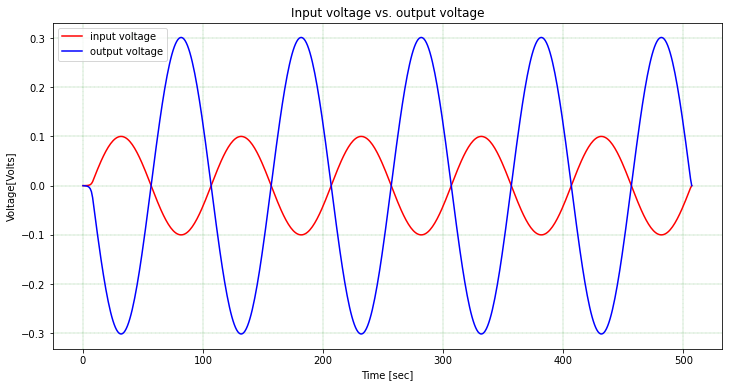

In [5]:
# analiza circuit si salvare rezultate analiza
# acestia sunt utilizati pentru calculul parametrilor analizei in regim tranzitoriu
N            =  5     
POINTS       =  500   
PERIOD       =  VG.period
analysis_tr1 =  simulator.transient(end_time = N*PERIOD, step_time = N*PERIOD/POINTS )
 # se utilizeaza variabila "simulator"

# tensiune de intrare vG

V1 = analysis_tr1.nodes['1']
V7 = analysis_tr1.nodes['7']


vG_wf = V1

# tensiune pe sarcina vL

vL_wf = V7
# afisare forme unda vG, vL

draw_waveforms(vG_wf, vL_wf)

#### 1.3. Distorsiunile introduse de catre amplificator - functionarea tranzistorului in afara R.A.N

Tranzistorul amplifica semnalele fara a introduce distorsiuni, numai daca functioneaza in Regiunea Activa Normala; daca functionarea tranzistorului iese din RAN, atunci acesta introduce distorsiuni in forma de unda a semnalului amplificat. 

1. sa se refaca punctele 1.1 si 1.2, pentru cazul in care valoarea rezistentei electrice a rezistorului $R_{B2}$ se alege egala cu valoarea rezistentei electrice $R_{B1}$ ($ R_{B2} = R_{B1}$); in acest caz, functionarea tranzistorului iese din RAN.
2. sa se vizualizeze formele de unda ale tensiunilor de intrare, $v_G$, respectiv pe sarcina, $v_L$; in acest scop, se va apela functia `draw_waveforms()`, implementata la inceputul laboratorului; pe graficul variatiei tensiunii pe sarcina $v_L$ se va observa modul in care amplificatorul introduce distorsiuni.

.title Tranzistorul in afara R.A.N
VG 1 0 DC 0V AC 1V SIN(0V 100mV 1kHz 0s 0Hz)
RG 1 2 600Ohm
CB 2 3 100uF
RB1 3 4 71kOhm
RB2 3 0 71kOhm
RC 4 5 2.2kOhm
RE 6 0 620Ohm
Q 5 3 6 2N2369
CL 5 7 100uF
RL 7 0 22kOhm
VCC 4 0 12V
.model 2N2369 npn (BF=78 CJC=2.83pF CJE=4.5pF IS=0.04pA RB=10Ohm RC=0.6Ohm RE=0.1Ohm VCEO=15V)

---------- PSF ----------
(P.S.F = (0.0042A , 0.1383V))
---------- Verificare RAN ----------
Q lucreaza in RAN: FALS


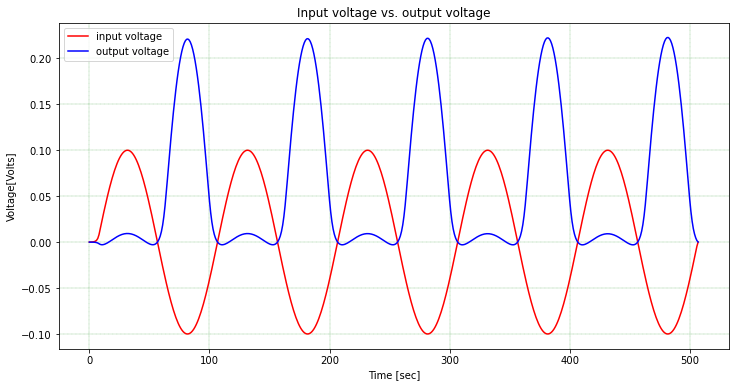

In [6]:
# import utilitare

from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import numpy as np

# instanta circuit

circuit2 = Circuit('Tranzistorul in afara R.A.N')

# model tranzistor

circuit2.model('2N2369', 'npn', 
                  BF  = 78,      IS  = 0.04@u_pA,  VCEO = 15@u_V, 
                  RB  = 10@u_Ohm, RC  = 0.6@u_Ohm,  RE   = 0.1@u_Ohm,    
                  CJC = 2.83@u_pF,   CJE = 4.5@u_pF)

VG = circuit2.SinusoidalVoltageSource('G', 1, 0,
                                      offset    = 0@u_V,
                                      amplitude = 100@u_mV,
                                      frequency = 1@u_kHz
                                      )

RG = circuit2.R('G', 1, 2, 600@u_Ohm)
CB = circuit2.C('B', 2, 3, 100@u_uF)
RB1 = circuit2.R('B1', 3, 4, 71@u_kOhm)
RB2 = circuit2.R('B2', 3, 0, 71@u_kOhm)
RC = circuit2.R('C', 4, 5, 2.2@u_kOhm)
RE = circuit2.R('E', 6, 0, 620@u_Ohm)
Q = circuit2.BJT('', 5, 3, 6,  model = '2N2369')
CL = circuit2.C('L', 5, 7, 100@u_uF)
RL = circuit2.R('L', 7, 0, 22@u_kOhm)
VCC = circuit2.V('CC', 4, 0, 12@u_V)

# afisare netlist

print(circuit2)

# instanta simulator

simulator2 = circuit2.simulator(temperature = 25, nominal_temperature= 25)

####### analiza OP ################################################

analysis_op2 = simulator2.operating_point()

# curent continuu IC

VRC = analysis_op2.nodes['4'] - analysis_op2.nodes['5']

IC_2 = VRC / RC.resistance

# tensiune continua VCE

VC = analysis_op2.nodes['5']
VE = analysis_op2.nodes['6']

VCE_2 = VC - VE

# afisare valoare P.S.F tranzistor
print('-'*10, 'PSF', '-'*10)

print(f'(P.S.F = ({np.round(IC_2.item(),4)}{IC_2.unit} , {np.round(VCE_2.item(),4)}{VCE_2.unit}))')


# verificare RAN:
print('-'*10, 'Verificare RAN', '-'*10)
ran_verif = 0.5 < VCE_2.item() < VCC.dc_value - 0.5
print(f'Q lucreaza in RAN: {"ADEVARAT" if ran_verif else "FALS"}')


###### analiza regim tranzitoriu ##################################

# analiza circuit si salvare rezultate analiza
# acestia sunt utilizati pentru calculul parametrilor analizei in regim tranzitoriu
N            =  5     
POINTS       =  500   
PERIOD       =  VG.period
analysis_tr2 =  simulator2.transient(end_time = N*PERIOD, step_time = N*PERIOD/POINTS )

# tensiune de intrare vG

vG2_wf = analysis_tr2.nodes['1']

# tensiune pe sarcina vL
vL2_wf = analysis_tr2.nodes['7']

# afisare forme unda vG, vL
draw_waveforms(vG2_wf, vL2_wf)

## 2. Banda de frecventa a amplificatorului

1. sa se simuleze circuitul din Figura 1 (cu valorile initiale  ale componentelor electronice) la temperatura de lucru de $25^o C$ si la temperatura nominala de $25^o C$; in cadrul simularii, sa se efectueze o analiza in regim variabil de semnal mic (*AC analysis*); parametrii analizei sunt:
  - frecventa start: 0.01[Hz]
  - frecventa stop: 1000[MHz]
  - variatie: pe decade
  - numar puncte pe decada, *POINTS* = 10
  
2. sa se determine tensiunea de intrare in circuit $v_G$, respectiv tensiunea pe sarcina amplificatorului $v_L$;
3. sa se determine variatia tensiunii de intrare in circuit $v_G$, respectiv variatia tensiunii pe sarcina amplificatorului $v_L$;
4. sa se determine valoarea modulului amplificarii in tensiune a circuitului, $|A_{Vg}|$
5. sa se determine valoarea din banda de frecventa a amplificarii in tensiune a circuitului $|A_{Vg0}|$
6. prin apelarea functiei `get_frequencies()`, implementata la inceputul laboratorului, sa se determine frecventele care corespund limitei benzii de frecventa: frecventa inferioara $f_J$, respectiv frecventa superioara $f_S$; variabilele  $f_J$ si $f_S$ sunt de tip `FrequencyValue`; valoarea numerica se extrage cu atributul `value`, iar unitatea de masura se extrage cu atributul `unit`;
7. sa se determine valoarea benzii de frecventa $B$ a amplificatorului; 
8. sa se afiseze rezultatele obtinute;
9. sa se afiseze caracteristica de frecventa a amplificatorului; se recomanda apelarea functiei `draw_freq_characteristics()`, implementata la inceputul laboratorului.

Avg0 = 3.012640870304142
fJ = 0.1259 Hz 
fS = 19952623.1497 Hz 
B = 19952623.0238 Hz


C:\Users\HP\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


TypeError: can't convert complex to float

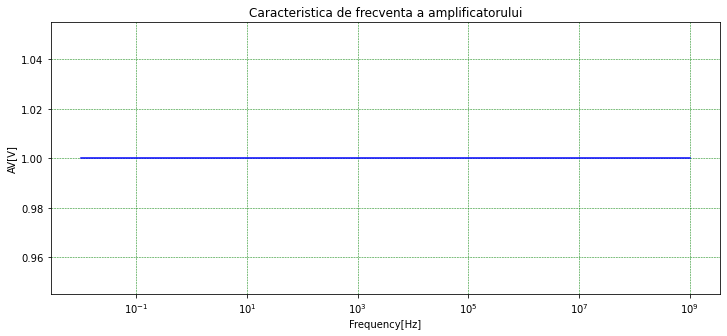

In [16]:
import numpy as np
# instanta simulator

simulator3 = circuit.simulator(temperature = 25, nominal_temperature= 25)

# analiza circuit si salvare rezultate analiza
POINTS_DEC =  10   

analysis_ac = simulator3.ac(start_frequency = 0.01@u_Hz, 
                            stop_frequency=1000@u_MHz,
                            variation = 'dec', 
                            number_of_points = POINTS_DEC
                           )

# extragere tensiune de intrare vG

vG_wf = analysis_ac.nodes['1']

# extragere tensiune pe sarcina vL

vL_wf = analysis_ac.nodes['7']

# variatie vG

delta_vG = np.sqrt(vG_wf.real**2 + vG_wf.imag**2 )

# variatie vL

delta_vL = np.sqrt(vL_wf.real**2 + vL_wf.imag**2 )

# amplificare in tensiune AVg:

Avg = abs(vL_wf / vG_wf)

# amplificare in tensiune in banda AVg0 (valoare maxima a amplificarii = ordinul unitatilor):
Avg0 = max(Avg) 

# determinare frecvente caracteristice:
# cele 2 frecvente sunt obiecte FrequencyValue
# fJ < 1Hz, fS > 1MHZ
fJ, fS = get_frequencies(analysis_ac,Avg)

# calcul banda frecventa:
# B este de tip FrequencyValue
B = fS - fJ

# afisare valoare amplificare tensiune in banda (valoare numerica):

print(f'Avg0 = {Avg0.value}')

# afisare valoare frecventa inferioara (valoare numerica si unitare masura)

print(f'fJ = {np.round(fJ.value,4)} {fJ.unit} ')

# afisare valoare frecventa superioara (valoare numerica si unitare masura)

print(f'fS = {np.round(fS.value,4)} {fS.unit} ')

# afisare valoare banda de frecventa (valoare numerica si unitare masura)

print(f'B = {np.round(B.value,4)} {B.unit}')

# afisare caracteristica de frecventa amplificator:

draw_freq_characteristics(analysis_ac, vG_wf)